In [1]:
pip install pandas scikit-learn matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


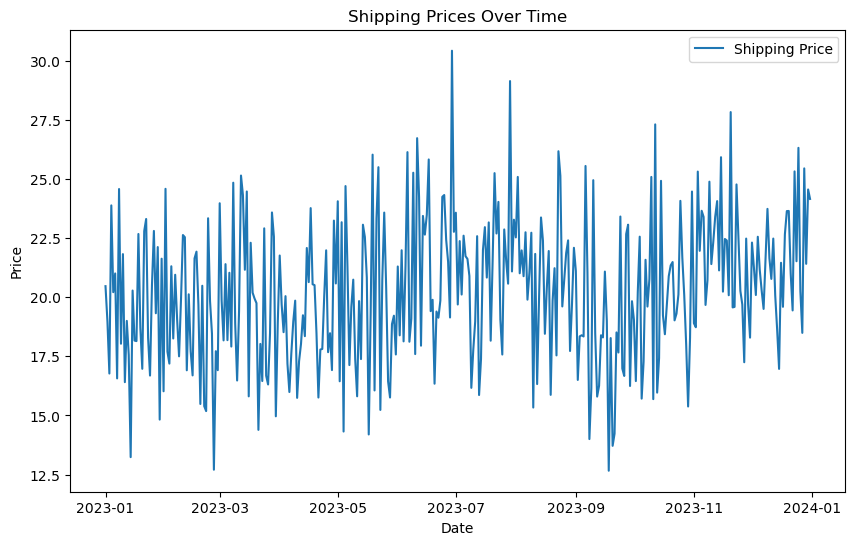

Mean Squared Error: 3.37


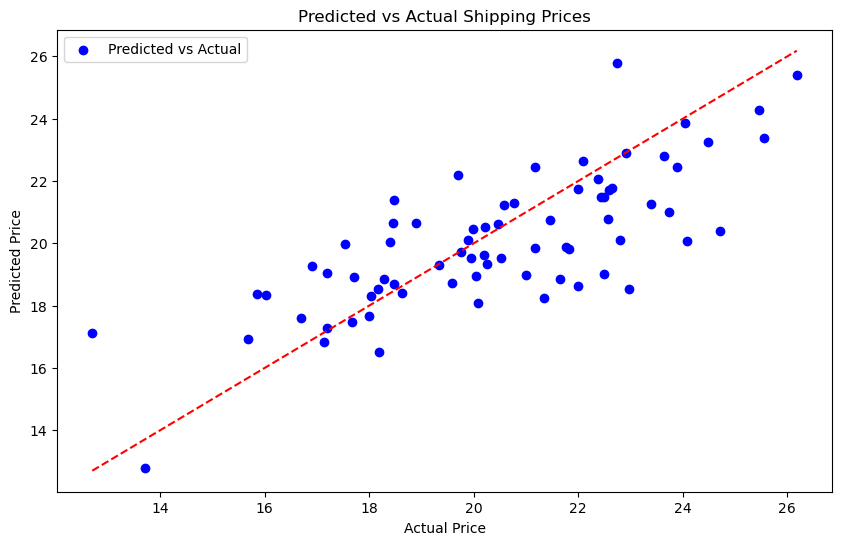

Predicted Dynamic Shipping Price: $24.20


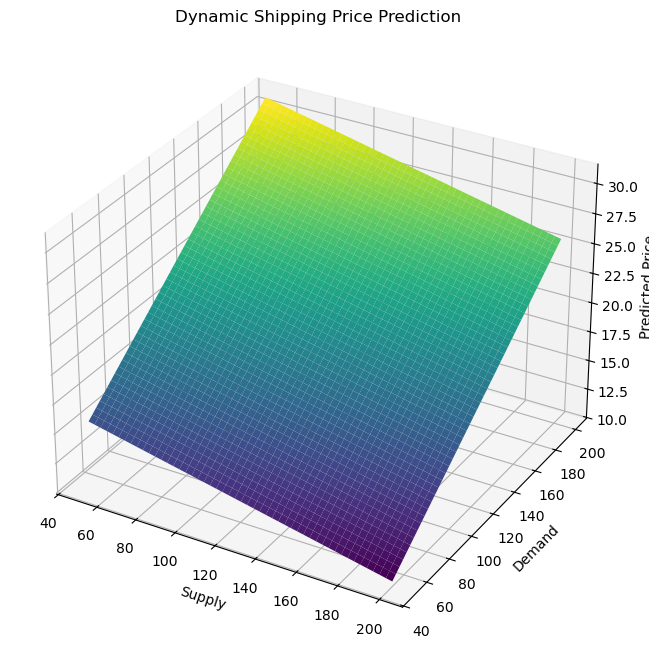

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# remove warning messages
import warnings
warnings.filterwarnings('ignore')


# Step 1: Generate Synthetic Data
np.random.seed(42)

# Simulate some data
dates = pd.date_range(start="2023-01-01", end="2023-12-31", freq='D')
num_samples = len(dates)

# Simulate features:
# - Demand (higher values mean higher demand)
# - Supply (higher values mean more supply)
# - Weather Index (1 = good weather, 0 = bad weather, etc.)
# - Seasonality (higher values during peak season)
demand = np.random.normal(loc=100, scale=20, size=num_samples)  # Simulated demand
supply = np.random.normal(loc=90, scale=10, size=num_samples)  # Simulated supply
weather = np.random.normal(loc=0.7, scale=0.1, size=num_samples)  # Simulated weather
seasonality = np.array([0.8 if (date.month in [11, 12, 6, 7, 8]) else 0.5 for date in dates])  # Higher price in peak season

# Target variable (shipping price), influenced by demand, supply, seasonality, and weather
price = 10 + 0.1 * demand - 0.05 * supply + 5 * seasonality + 2 * weather + np.random.normal(0, 2, num_samples)

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Demand': demand,
    'Supply': supply,
    'Weather': weather,
    'Seasonality': seasonality,
    'Price': price
})

# Step 2: Visualize the Data (Optional)
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Price'], label='Shipping Price')
plt.title('Shipping Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Step 3: Prepare Features and Target
features = ['Demand', 'Supply', 'Weather', 'Seasonality']
X = data[features]
y = data['Price']

# Step 4: Train a Linear Regression Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the Model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Visualize the predicted vs actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Shipping Prices')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.show()

# Step 6: Dynamic Price Prediction (Example Usage)
# Now let's simulate real-time prediction for dynamic pricing

def predict_price(demand, supply, weather, seasonality):
    features = np.array([[demand, supply, weather, seasonality]])
    predicted_price = model.predict(features)
    return predicted_price[0]

# Example Usage: Predicting price for specific conditions
current_demand = 120  # Higher demand
current_supply = 80   # Lower supply
current_weather = 0.9  # Good weather
current_seasonality = 0.9  # Peak season

predicted_price = predict_price(current_demand, current_supply, current_weather, current_seasonality)
print(f"Predicted Dynamic Shipping Price: ${predicted_price:.2f}")

# Example: Showing a plot of how price changes with demand and supply
demand_range = np.linspace(50, 200, 50)
supply_range = np.linspace(50, 200, 50)
price_matrix = np.zeros((len(demand_range), len(supply_range)))

for i, demand_value in enumerate(demand_range):
    for j, supply_value in enumerate(supply_range):
        price_matrix[i, j] = predict_price(demand_value, supply_value, 0.7, 0.5)  # Assuming average weather and off-peak season

# Plot the 3D surface plot of price prediction
X, Y = np.meshgrid(supply_range, demand_range)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, price_matrix, cmap='viridis')

ax.set_xlabel('Supply')
ax.set_ylabel('Demand')
ax.set_zlabel('Predicted Price')
ax.set_title('Dynamic Shipping Price Prediction')
plt.show()


In [6]:
import numpy as np
import random

# Define possible actions (pricing adjustments)
actions = [0.5, 1.0, 1.5]  # 0.5x, 1x, 1.5x (price multipliers)

class Agent:
    def __init__(self, name, demand_factor, supply_factor, seasonality_factor):
        self.name = name
        self.demand_factor = demand_factor
        self.supply_factor = supply_factor
        self.seasonality_factor = seasonality_factor
        self.q_table = {}  # Q-table for storing action values
        self.alpha = 0.1  # learning rate
        self.gamma = 0.9  # discount factor
        self.epsilon = 0.1  # exploration probability

    def get_state(self, demand, supply, seasonality):
        """Generate state representation (simplified)."""
        return (demand > self.demand_factor, supply < self.supply_factor, seasonality > self.seasonality_factor)

    def choose_action(self, state):
        """Choose action based on epsilon-greedy strategy."""
        if random.uniform(0, 1) < self.epsilon:
            # Explore: Random action
            return random.choice(actions)
        else:
            # Exploit: Choose best known action
            return self.q_table.get(state, {}).get(max(self.q_table.get(state, {}).values(), default=0))

    def learn(self, state, action, reward, next_state):
        """Update Q-table based on reward."""
        best_next_action = max(self.q_table.get(next_state, {}).values(), default=0)
        old_q_value = self.q_table.get(state, {}).get(action, 0)
        new_q_value = old_q_value + self.alpha * (reward + self.gamma * best_next_action - old_q_value)
        if state not in self.q_table:
            self.q_table[state] = {}
        self.q_table[state][action] = new_q_value

# Create multiple agents for different factors
agents = [
    Agent('DemandAgent', demand_factor=100, supply_factor=90, seasonality_factor=0.8),
    Agent('SupplyAgent', demand_factor=90, supply_factor=80, seasonality_factor=0.5),
    Agent('SeasonalityAgent', demand_factor=100, supply_factor=100, seasonality_factor=0.7)
]

# Simulate environment interaction
def simulate(pricing_agents, episodes=1000):
    for episode in range(episodes):
        # Simulated environment state (simplified)
        demand = random.randint(80, 120)
        supply = random.randint(70, 110)
        seasonality = random.random()

        # Get state from agents
        states = [agent.get_state(demand, supply, seasonality) for agent in pricing_agents]

        # Each agent chooses an action
        actions_taken = [agent.choose_action(state) for agent, state in zip(pricing_agents, states)]

        # Ensure we don't sum `None` values
        actions_taken = [action for action in actions_taken if action is not None]

        # Simulate reward based on action (simplified example)
        reward = sum(actions_taken)  # Example: higher reward for higher prices

        # Learn from actions
        for agent, state, action in zip(pricing_agents, states, actions_taken):
            agent.learn(state, action, reward, state)

# Run simulation
simulate(agents)


In [10]:
import openai

openai.api_key = 'API Key'

def get_gpt4_response(query):
    """Use OpenAI's GPT-4 to get pricing strategy advice."""    
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": f"{query}"}]
    )
    return response['choices'][0]['message']['content']

    
# Example prompt for GPT-4
query = """
The demand for shipping is very high today due to a global holiday, but we have limited supply.
How should we adjust our shipping prices to maximize profit without causing customer dissatisfaction?
"""

pricing_advice = get_gpt4_response(query)
print("GPT-4 Pricing Advice:", pricing_advice)


GPT-4 Pricing Advice: One option could be to implement surge pricing or dynamic pricing, where the shipping prices fluctuate based on demand. This can help maximize profit during peak times while still providing a fair market price for customers. Additionally, offering discounts or promotions for customers who are willing to wait for their shipping can help incentivize them to choose a slower shipping option, reducing strain on limited supply. Communicating openly and transparently with customers about the situation and the reasons for any price adjustments is also key to minimizing dissatisfaction. Ultimately, finding the right balance between supply and demand to optimize profit while maintaining customer satisfaction is crucial in this situation.
